# Data Science Project Steps

1. Define the Research problem and questions
2. Analyze data by descriptive statistics and graphical visualization.
3. Prepare data by using relevant preprocessing transformations, data cleaning, 
    data standardization,deaing with null and outlier values. Divide data into test and training set.
4. Fit the train data. Predict the test data.
5. Evaluate the first algorithm and its model performance.
6. Evaluate the current algorithm and variety of algorithms by creating test harness for diverse
    algorithms in conjunction with resampling techniques like cross validation, variable importance.
    bootstrapping.Improve Result by playing with hyperparameters and innovative methods like 
   ensembles.
7. Choose the best model and present the results. 

##  Define the Research problem and questions

Predict Survived

## Analyze data by descriptive statistics and graphical visualization.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sb
import scipy.stats as stat
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

TitanicData = pd.read_csv('train.csv')
import warnings
warnings.filterwarnings('ignore')
print(TitanicData.shape)
print(TitanicData.head())

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

## Prepare data by using relevant preprocessing transformations, data cleaning, data standardization,deaing with null and outlier values. Divide data into test and training set.
## Fit the train data. Predict the test data.
## Evaluate the first algorithm and its model performance.

In [2]:
TitanicData = TitanicData[['Survived', 'Pclass', 'Sex', 'SibSp','Parch','Age','Fare', 'Embarked']]

In [3]:
TitanicData['Sex'] = TitanicData['Sex'].replace(['male','female'],[1,0])
TitanicData['Embarked'] = TitanicData['Embarked'].replace(['S','C','Q'],[0,1,2])
TitanicData.dropna(inplace=True)
X = TitanicData['Age'].values.reshape(-1,1)
y = TitanicData['Survived'].values.reshape(-1,1)

[0.47949628]
[[-0.00269049]]


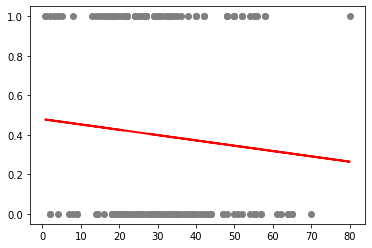

     Actual  Predicted
0         0   0.404163
1         0   0.398782
2         1   0.477021
3         0   0.382639
4         0   0.353043
..      ...        ...
173       1   0.412234
174       0   0.379948
175       0   0.404163
176       1   0.323448
177       0   0.422996

[178 rows x 2 columns]
Mean Squared Error: 0.24099279544474866
Root Mean Squared Error: 0.49091017044338026


In [4]:
#Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
regressor = LinearRegression()  
#Training the Regression algorithm
regressor.fit(X_train, y_train) 
 # Intercept:
print(regressor.intercept_)
# Slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
# Create scatter plot
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(df)

# Mean Squared Errror and Root Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


## Evaluate the current algorithm and variety of algorithms by creating test harness for diverse algorithms in conjunction with resampling techniques like cross validation, variable importance.bootstrapping.Improve Result by playing with hyperparameters and innovative methods like Logistic Regression,Lasso Regression or Ridge Regression
  

### Predict Risk using all the other variables in the HeartAttack dataset.

## Logistic Regression 

In [5]:
#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

X = TitanicData[['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']] 
y = TitanicData[['Survived']]

# Dividing data into two subsets :train and test set.Training set trains the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.802621 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.801452 (0.046559) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.801452 (0.046559) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.801452 (0.046559) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.802621 (0.047121) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.802621 (0.047121) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.802621 (0.047121) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.800867 (0.049375) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.800867 (0.049375) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.799697 (0.048586) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.790309 (0.055370) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.790309 (0.055370) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.787385 (0.053738) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.783229 (0.044109) with

## Ridge Regression

In [6]:
# https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

# example of grid searching key hyperparametres for ridge classifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

X = TitanicData[['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']] 
y = TitanicData[['Survived']]

# Dividing data into two subsets :train and test set.Training set trains the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



Best: 0.787897 using {'alpha': 0.1}
0.787897 (0.053867) with: {'alpha': 0.1}
0.787897 (0.053867) with: {'alpha': 0.2}
0.787897 (0.053867) with: {'alpha': 0.3}
0.787897 (0.053867) with: {'alpha': 0.4}
0.787897 (0.053867) with: {'alpha': 0.5}
0.787897 (0.053867) with: {'alpha': 0.6}
0.787897 (0.053867) with: {'alpha': 0.7}
0.787897 (0.053867) with: {'alpha': 0.8}
0.787897 (0.053867) with: {'alpha': 0.9}
0.787897 (0.053867) with: {'alpha': 1.0}
